<a href="https://colab.research.google.com/github/drzasrly/ANN_Pedeteksi-Jenis-Kulit-Wajah/blob/main/ANN_KulitDanWajah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import cv2
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutil
import os

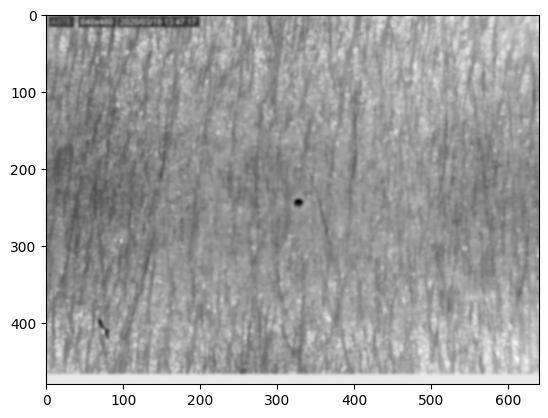

Mean: 0.6313170317606209
Std Deviasi: 0.07604152460830207
Variansi: 0.0057823134647550095
Percentile 25%: 0.5843137254901961
Percentile 75%: 0.6705882352941176


In [5]:
# Periksa file
file_path = '/content/drive/MyDrive/dataverse_files/Normal/augNormal_1-1.jpg'
if not os.path.exists(file_path):
    print(f"File tidak ditemukan di path: {file_path}")
else:
    # Baca citra
    image = cv2.imread(file_path, cv2.IMREAD_COLOR)
    if image is None:
        print("Error: File tidak berhasil dibaca oleh OpenCV.")
    else:
        # Lanjutkan pengolahan
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        image = image / 255
        plt.imshow(image, cmap='gray')
        plt.show()

        mean = np.mean(image)
        std = np.std(image)
        var = np.var(image)
        percent1 = np.percentile(image, 25)
        percent2 = np.percentile(image, 75)

        print("Mean:", mean)
        print("Std Deviasi:", std)
        print("Variansi:", var)
        print("Percentile 25%:", percent1)
        print("Percentile 75%:", percent2)


In [6]:
image

array([[0.64313725, 0.64705882, 0.65490196, ..., 0.81176471, 0.82352941,
        0.83137255],
       [0.63921569, 0.64313725, 0.64705882, ..., 0.81176471, 0.82352941,
        0.82745098],
       [0.63529412, 0.63529412, 0.62745098, ..., 0.81176471, 0.81960784,
        0.82745098],
       ...,
       [0.87058824, 0.87058824, 0.87058824, ..., 0.87058824, 0.87058824,
        0.87058824],
       [0.87058824, 0.87058824, 0.87058824, ..., 0.87058824, 0.87058824,
        0.87058824],
       [0.87058824, 0.87058824, 0.87058824, ..., 0.87058824, 0.87058824,
        0.87058824]])

In [7]:

normal_path = '/content/drive/MyDrive/dataverse_files/Normal'
dry_path = '/content/drive/MyDrive/dataverse_files/Dry'
oily_path = '/content/drive/MyDrive/dataverse_files/Oily'
combi_path = '/content/drive/MyDrive/dataverse_files/Combination'
image_feature = []

for file in os.listdir(normal_path):
    image = cv2.imread(os.path.abspath(normal_path + "/" + file))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = image / 255
    mean = np.mean(image)
    std = np.std(image)
    var = np.var(image)
    percent1 = np.percentile(image, 25)
    percent2 = np.percentile(image, 75)
    label = 0
    feature = (file, mean, std, var, percent1, percent2, label)
    image_feature.append(feature)

for file in os.listdir(dry_path):
    image = cv2.imread(os.path.abspath(dry_path + "/" + file))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = image / 255
    mean = np.mean(image)
    std = np.std(image)
    var = np.var(image)
    percent1 = np.percentile(image, 25)
    percent2 = np.percentile(image, 75)
    label = 1
    feature = (file, mean, std, var, percent1, percent2, label)
    image_feature.append(feature)

for file in os.listdir(oily_path):
    image = cv2.imread(os.path.abspath(oily_path + "/" + file))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = image / 255
    mean = np.mean(image)
    std = np.std(image)
    var = np.var(image)
    percent1 = np.percentile(image, 25)
    percent2 = np.percentile(image, 75)
    label = 2
    feature = (file, mean, std, var, percent1, percent2, label)
    image_feature.append(feature)

for file in os.listdir(combi_path):
    image = cv2.imread(os.path.abspath(combi_path + "/" + file))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = image / 255
    mean = np.mean(image)
    std = np.std(image)
    var = np.var(image)
    percent1 = np.percentile(image, 25)
    percent2 = np.percentile(image, 75)
    label = 3
    feature = (file, mean, std, var, percent1, percent2, label)
    image_feature.append(feature)

df = pd.DataFrame(image_feature, columns=['file', 'mean', 'std', 'var', 'percentile 25', 'percentile 75', 'label'])
df.to_csv('fitur.csv', index=False)
shutil.copy("fitur.csv", "/content/drive/MyDrive/dataverse_files")

'/content/drive/MyDrive/dataverse_files/fitur.csv'

In [8]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
file_path = ('/content/drive/MyDrive/dataverse_files/fitur.csv')
read_file = pd.read_csv(file_path)
df = pd.DataFrame(read_file)
df

,file,mean,std,var,percentile 25,percentile 75,label
0,augNormal_9-1.jpg,0.609806,0.069310,0.004804,0.568627,0.643137,0
1,augNormal_19-1.jpg,0.605135,0.101163,0.010234,0.541176,0.658824,0
2,augNormal_5-1.jpg,0.626423,0.101123,0.010226,0.560784,0.678431,0
3,augNormal_18-1.jpg,0.626420,0.101114,0.010224,0.560784,0.678431,0
4,augNormal_20-1.jpg,0.612280,0.098569,0.009716,0.549020,0.662745,0
...,...,...,...,...,...,...,...
63,augCombi_3.jpg,0.647393,0.104283,0.010875,0.584314,0.713725,3
64,augCombi_13.jpg,0.615332,0.138816,0.019270,0.560784,0.690196,3
65,augCombi_14.jpg,0.652356,0.096195,0.009254,0.596078,0.713725,3
66,augCombi_9.jpg,0.637665,0.097626,0.009531,0.572549,0.701961,3


In [10]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

le = LabelEncoder()
le.fit(df["label"].values)

target = le.transform(df['label'].values)
target = to_categorical(target)
target

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],


In [11]:
features = ['mean', 'std', 'var', 'percentile 25', 'percentile 75']
x = df.loc[:, features].values
y = df['label'].values

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(len(y_train))
print(len(y_test))

54
14


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
from keras import backend as K
import tensorflow as tf

# Custom metrics
def precision(y_true, y_pred):
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    predicted_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    return precision

def recall(y_true, y_pred):
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    possible_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true, 0, 1)))
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    return recall


# Create model
def nn_model(max_len):
    model = Sequential()
    model.add(Input(shape=(max_len,)))
    model.add(Dense(32, activation="elu"))
    model.add(Dense(1024, activation="elu"))
    model.add(Dense(512, activation="elu"))
    model.add(Dense(256, activation="elu"))
    model.add(Dense(128, activation="elu"))
    model.add(Dense(64, activation="elu"))
    model.add(Dense(32, activation="elu"))
    model.add(Dense(16, activation="elu"))
    model.add(Dense(4, activation="sigmoid"))  # Sigmoid untuk output

    model.summary()
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy', precision, recall])
    return model

# Check model
def check_model(model_, x, y, x_val, y_val, epochs_, batch_size_):
    hist = model_.fit(x,
                      y,
                      epochs=epochs_,
                      batch_size=batch_size_,
                      validation_data=(x_val, y_val))
    return hist

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dense_17 = Dense(4, activation='softmax')  # 4 units sesuai dengan jumlah kelas
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)


In [18]:
max_len = x_train.shape[1]
print(f"Max Length: {max_len}")
EPOCHS = 1000
BATCH_SIZE = 32

model = nn_model(max_len)
history = check_model(model, x_train, y_train, x_test, y_test, EPOCHS, BATCH_SIZE)

Max Length: 5


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 32)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1024)                │          33,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 733,940 (2.80 MB)

 Trainable params: 733,940 (2.80 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 326ms/step - accuracy: 0.2789 - loss: 1.5565 - precision: 0.2658 - recall: 0.5152 - val_accuracy: 0.2143 - val_loss: 1.8942 - val_precision: 0.2143 - val_recall: 0.4286
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2581 - loss: 1.5564 - precision: 0.2723 - recall: 0.5663 - val_accuracy: 0.2143 - val_loss: 1.4336 - val_precision: 0.2143 - val_recall: 0.4286
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.1944 - loss: 1.4482 - precision: 0.2197 - recall: 0.4394 - val_accuracy: 0.3571 - val_loss: 1.3589 - val_precision: 0.3043 - val_recall: 0.5000
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1879 - loss: 1.4214 - precision: 0.2578 - recall: 0.3049 - val_accuracy: 0.2143 - val_loss: 1.4607 - val_precision: 0.2222 - val_recall: 0.2857
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.2685 - loss: 1.3792 - precision: 0.2646 - recall: 0.3087 - val_accuracy: 0.2143 - val_loss: 1.5446

In [19]:
print(model)
print(history)

<Sequential name=sequential_1, built=True>


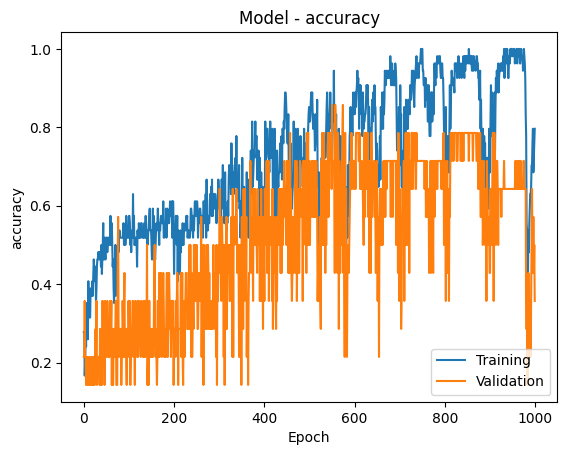

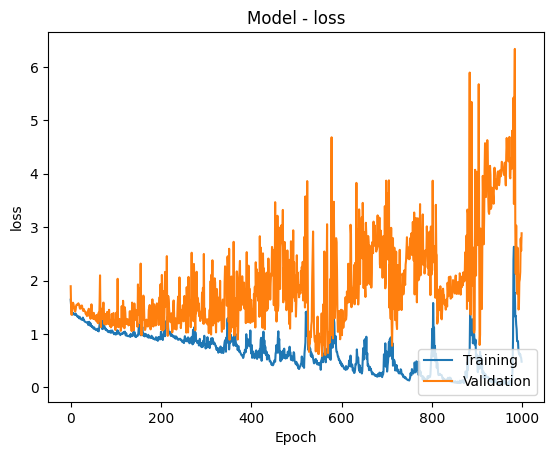

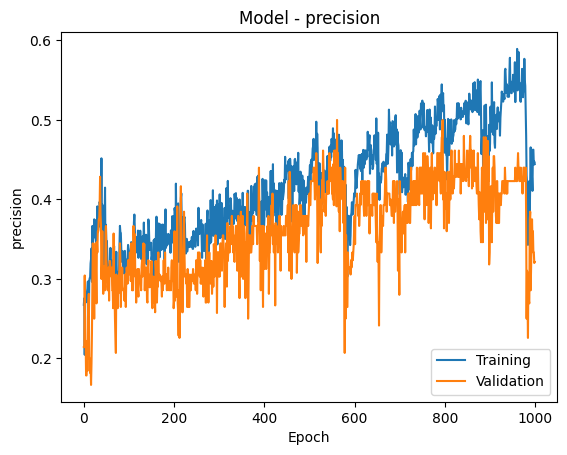

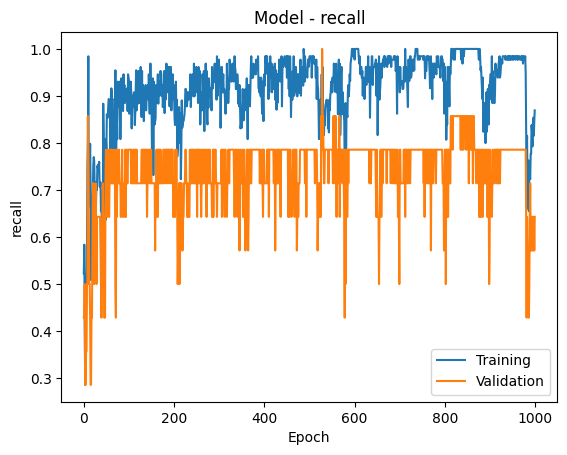

In [21]:
def evaluate_model_(history):
  names = [['accuracy', 'val_accuracy'],
           ['loss', 'val_loss'],
           ['precision', 'val_precision'],
           ['recall', 'val_recall']]

  for name in names :
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history[name[0]])
    plt.plot(history.history[name[1]])
    plt.xlabel('Epoch')
    plt.ylabel(name[0])
    plt.title('Model - ' + name[0])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show

evaluate_model_(history)

In [ ]:
print(check_model)

<function check_model at 0x7bf4c5da8ae0>


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


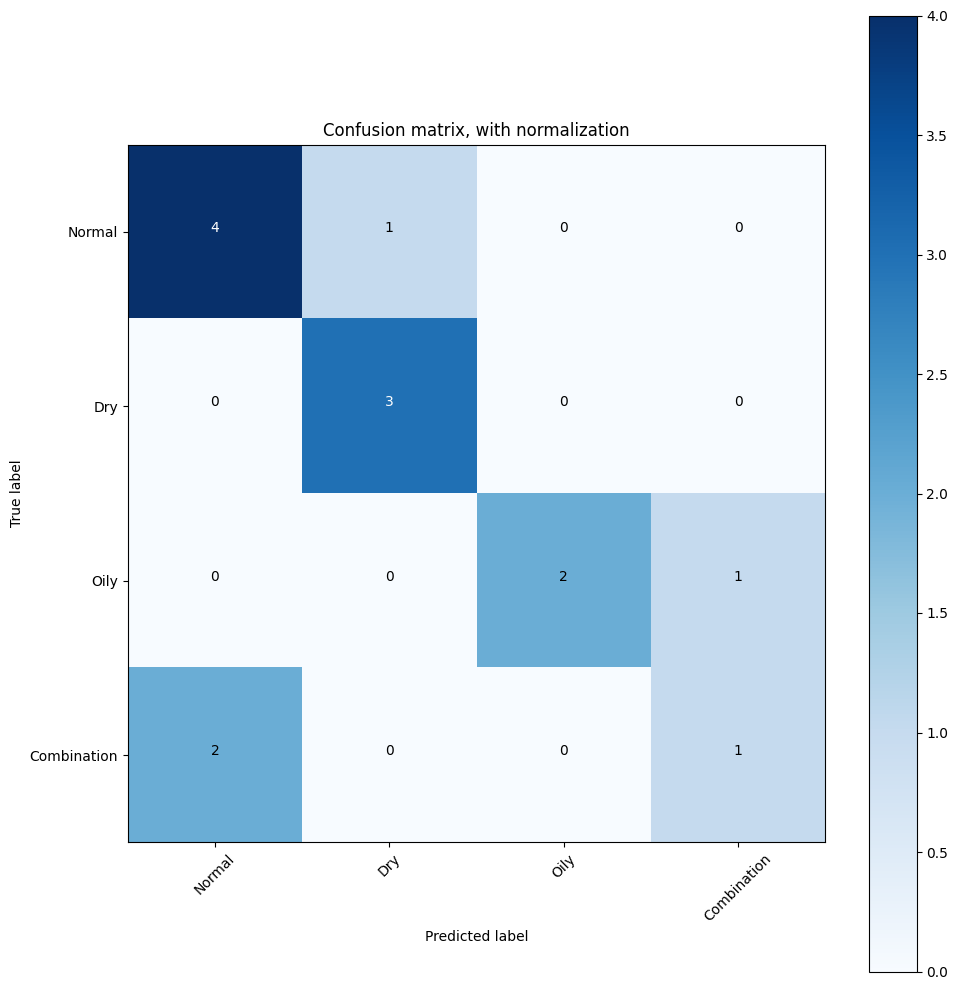

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          tittle='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  plt.figure(figsize=(10,10))

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(tittle)
  plt.colorbar()

  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
              horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

#predict test data
y_pred=model.predict(x_test)

#compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

#plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix,
                      classes=['Normal', 'Dry', 'Oily', 'Combination'],
                      normalize=False,
                      tittle='Confusion matrix, with normalization')

In [ ]:
y_pred

array([[8.16e-01, 4.70e-01, 9.93e-01, 1.00e+00],
       [3.61e-03, 1.00e+00, 9.42e-01, 3.67e-02],
       [7.32e-01, 2.86e-01, 4.46e-01, 6.03e-01],
       [7.28e-01, 2.25e-01, 4.52e-01, 6.83e-01],
       [1.00e+00, 1.00e+00, 7.48e-05, 4.94e-04],
       [6.84e-04, 7.54e-01, 9.85e-01, 4.35e-01],
       [1.00e+00, 9.89e-01, 7.18e-02, 9.99e-01],
       [9.79e-01, 2.32e-01, 5.12e-01, 8.42e-01],
       [1.00e+00, 1.00e+00, 4.10e-04, 9.13e-01],
       [1.63e-01, 8.12e-01, 5.02e-01, 9.88e-02],
       [6.07e-01, 6.12e-01, 4.42e-01, 4.11e-01],
       [7.42e-01, 2.11e-01, 4.56e-01, 8.26e-01],
       [7.50e-03, 7.25e-01, 9.27e-01, 1.20e-01],
       [8.56e-01, 3.33e-01, 5.40e-01, 7.04e-01]], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis=1),
                            y_pred.argmax(axis=1),
                            target_names=['Normal', 'Dry', 'Oily', 'Combination']))

              precision    recall  f1-score   support

      Normal       0.67      0.80      0.73         5
         Dry       0.75      1.00      0.86         3
        Oily       1.00      0.67      0.80         3
 Combination       0.50      0.33      0.40         3

    accuracy                           0.71        14
   macro avg       0.73      0.70      0.70        14
weighted avg       0.72      0.71      0.70        14



In [ ]:
import shutil
#simpan model ann
model.save("model1.keras")
print("saved model to disk")

saved model to disk


**PREDIKSI**

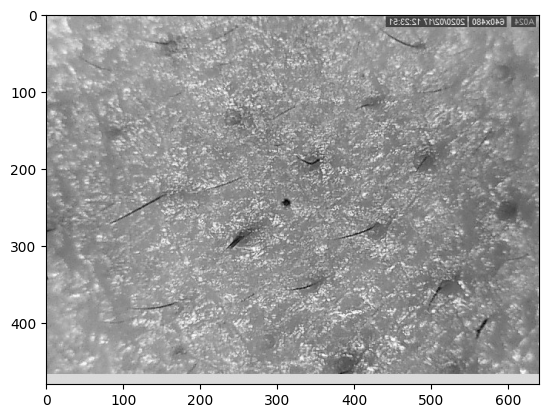

In [ ]:
import csv
import cv2
import matplotlib.pyplot as plt

#baca citranya dulu
image = cv2.imread('/content/drive/MyDrive/dataverse_files/dataTest/Dry15.jpg', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
imgae=image/255
plt.imshow(image, cmap='gray')
plt.show()

#ekstrasi fitur
mean = np.mean(image)
std = np.std(image)
var = np.var(image)
percent1 = np.percentile(image, 25)
percent2 = np.percentile(image, 75)

In [ ]:
x = [[mean, std, var, percent1, percent2]]
x = np.array(x)

In [ ]:
y_pred=model.predict(x)
classes_y=np.argmax(y_pred,axis=1)

if classes_y==[0]:
  print('Normal')
elif classes_y==[1]:
  print('Dry')
elif classes_y==[2]:
  print('Oily')
else:
  print('Combination')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
Normal


In [ ]:
import numpy as np
import pandas as pd

# Simpan ke CSV
y_pred = model.predict(x)
classes_y = np.argmax(y_pred, axis=1)
pd.DataFrame(classes_y, columns=['Predicted Class']).to_csv('predictions.csv', index=False)

print("Predictions saved to 'predictions.csv'")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predictions saved to 'predictions.csv'


In [ ]:
# Baca dari CSV
predictions = pd.read_csv('predictions.csv')
classes_y = predictions['Predicted Class'].to_numpy()
print(classes_y)


[0]


**CNN UMUR**

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Project5_AgeGenderEmotion_Detection')

In [ ]:
from keras.models import load_model
from PIL import Image
import numpy as np
import cv2

#the following are to do with this interactive notebook code

%matplotlib inline
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook


In [ ]:
export_dir='/content/drive/MyDrive/Project5_AgeGenderEmotion_Detection/1.1_age_input_output/output/age_model_pretrained.h5'
age_model = load_model(export_dir)

# summarize model.
age_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 48, 48, 64)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 23, 23, 128)         │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 21, 21, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 10, 10, 256)         │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 132)                 │          33,924 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             931 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 422,697 (1.61 MB)

 Trainable params: 422,695 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# load and evaluate a saved model
export_dir='/content/drive/MyDrive/Project5_AgeGenderEmotion_Detection/1.2_gender_input_output/output/gender_model_pretrained.h5'
gender_model = load_model(export_dir)

# summarize model.
gender_model.summary()

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_1 (InputLayer)                 │ (None, 100, 100, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 98, 98, 70)          │             700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 96, 96, 65)          │          41,015 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 96, 96, 65)          │             260 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 48, 48, 65)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 60)          │          35,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 46, 46, 60)          │             240 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 60)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 31740)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,031,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 40)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,113,275 (8.06 MB)

 Trainable params: 2,113,023 (8.06 MB)

 Non-trainable params: 250 (1000.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
export_dir='/content/drive/MyDrive/Project5_AgeGenderEmotion_Detection/1.3_emotion_input_output/output/emotion_model_pretrained.h5'
emotion_model = load_model(export_dir)

# summarize model.
emotion_model.summary()

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_1 (InputLayer)                 │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 683,269 (2.61 MB)

 Trainable params: 683,267 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

**TEST GAMBAR**

In [ ]:
# Labels on Age, Gender and Emotion to be predicted

age_ranges = ['1-2', '3-9', '10-20', '21-27', '28-45', '46-65', '66-116']
gender_ranges = ['male', 'female']
emotion_ranges= ['positive','negative','neutral']

In [105]:
img_path = "./1.4_test_input/images/family.jpg"

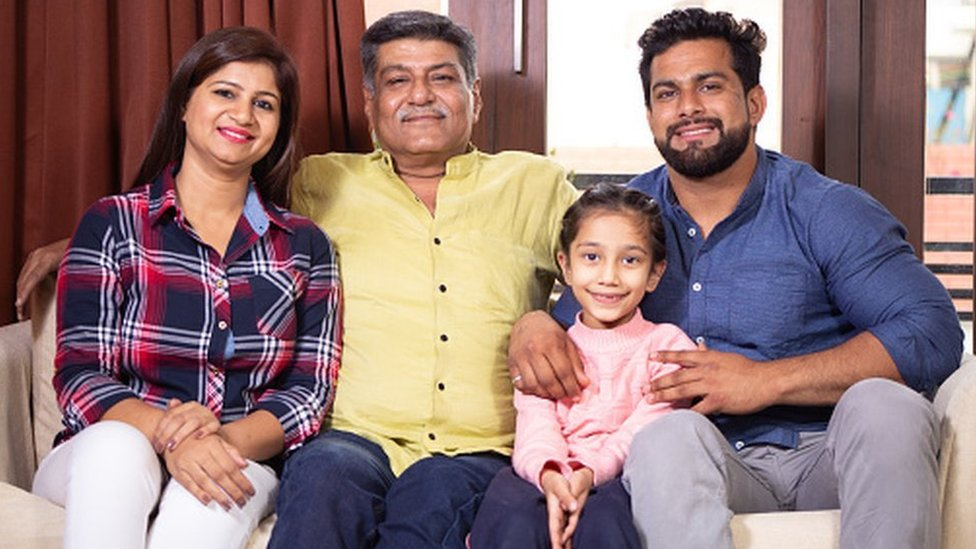

In [106]:
from IPython.display import Image
pil_img = Image(filename=img_path)
display(pil_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1: male, 46-65, positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
2: male, 28-45, positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
3: female, 28-45, positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
4: female, 10-20, positive


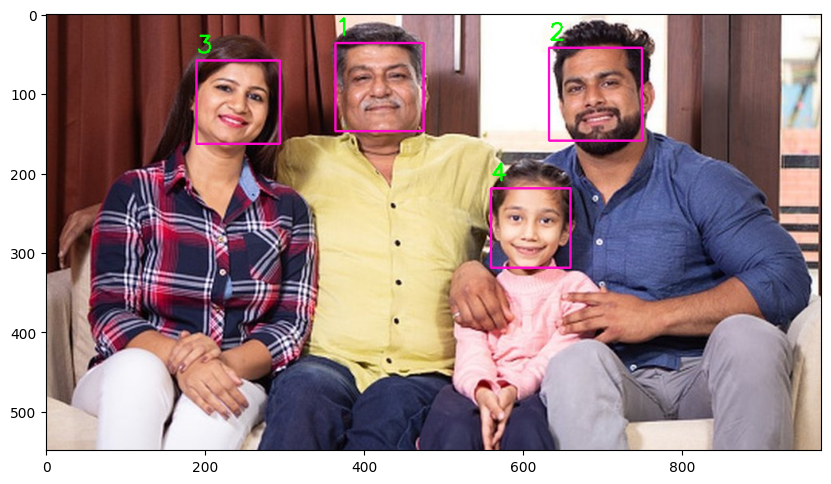

In [108]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image and convert to grayscale
test_image = cv2.imread(img_path)
gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Load Haar Cascade Classifier for face detection
face_cascade = cv2.CascadeClassifier('./1.4_test_input/cv2_cascade_classifier/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

if len(faces) == 0:
    print("No faces detected.")
else:
    i = 0
    for (x, y, w, h) in faces:
        i += 1
        cv2.rectangle(test_image, (x, y), (x + w, y + h), (203, 12, 255), 2)

        # Emotion Detection
        img_gray = gray[y:y + h, x:x + w]
        emotion_img = cv2.resize(img_gray, (48, 48), interpolation=cv2.INTER_AREA)
        emotion_image_array = np.array(emotion_img)
        emotion_input = np.expand_dims(emotion_image_array, axis=0)
        output_emotion = emotion_ranges[np.argmax(emotion_model.predict(emotion_input))]

        # Gender Detection
        gender_img = cv2.resize(img_gray, (100, 100), interpolation=cv2.INTER_AREA)
        gender_image_array = np.array(gender_img)
        gender_input = np.expand_dims(gender_image_array, axis=0)
        output_gender = gender_ranges[np.argmax(gender_model.predict(gender_input))]

        # Age Detection
        age_img = cv2.resize(img_gray, (200, 200), interpolation=cv2.INTER_AREA)
        age_input = age_img.reshape(-1, 200, 200, 1)
        output_age = age_ranges[np.argmax(age_model.predict(age_input))]

        # Print results
        output_str = f"{i}: {output_gender}, {output_age}, {output_emotion}"
        print(output_str)

        # Display detected faces with output information
        col = (0, 255, 0)
        cv2.putText(test_image, str(i), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, col, 2)

    # Display image with detected faces
    plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))


In [2]:
import csv

# Path to save the CSV file
output_csv_path = "path_to_save_detection_results.csv"

# Open file for writing
with open(output_csv_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Index", "X", "Y", "W", "H", "Gender", "Age", "Emotion"])

    i = 0
    for (x, y, w, h) in faces:
        i += 1
        img_gray = gray[y:y + h, x:x + w]
        emotion_img = cv2.resize(img_gray, (48, 48), interpolation=cv2.INTER_AREA)
        emotion_image_array = np.array(emotion_img)
        emotion_input = np.expand_dims(emotion_image_array, axis=0)
        output_emotion = emotion_ranges[np.argmax(emotion_model.predict(emotion_input))]

        gender_img = cv2.resize(img_gray, (100, 100), interpolation=cv2.INTER_AREA)
        gender_image_array = np.array(gender_img)
        gender_input = np.expand_dims(gender_image_array, axis=0)
        output_gender = gender_ranges[np.argmax(gender_model.predict(gender_input))]

        age_img = cv2.resize(img_gray, (200, 200), interpolation=cv2.INTER_AREA)
        age_input = age_img.reshape(-1, 200, 200, 1)
        output_age = age_ranges[np.argmax(age_model.predict(age_input))]

        # Save each detection into CSV without the image data
        writer.writerow([i, x, y, w, h, output_gender, output_age, output_emotion])


In [ ]:
import pandas as pd

# Path to the CSV file
input_csv_path = "path_to_save_data.csv"

# Load CSV into DataFrame
df = pd.read_csv(input_csv_path)

# Display the DataFrame
print(df)

# Pilih beberapa kolom tertentu untuk ditampilkan
print(df[["Index", "Gender", "Age", "Emotion"]])
